# Handling Multiple Output

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [29]:
tf.__version__

'2.17.0'

In [30]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
keras.__version__

'3.4.1'

In [32]:
california_housing = tf.keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=42
)
(X_train_full, y_train_full), (X_test, y_test) = california_housing

In [33]:
X_train_full.shape

(16512, 8)

In [34]:
X_test.shape

(4128, 8)

In [35]:
X_train, X_valid = X_train_full[:12000], X_train_full[12000:]
y_train, y_valid = y_train_full[:12000], y_train_full[12000:]

In [36]:
X_train.shape

(12000, 8)

In [37]:
X_valid.shape

(4512, 8)

In [38]:
X_train.shape[1:]

(8,)

In [39]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

## Single Ouput and Wide & Deep

What if part of the input we want to handle it as a simple concepts or patterns to learn and the rest of the inputs
should be analyzed and learned deeplier.

![](assets/wide-and-deep-multiple-inputs.png)

In [40]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")

norm_layer_wide = tf.keras.layers.Normalization(name="normalization_wide")
norm_layer_wide.adapt(X_train_wide)

norm_layer_deep = tf.keras.layers.Normalization(name="normalization_deep")
norm_layer_deep.adapt(X_train_deep)

hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu", name="hidden_1")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu", name="hidden_2")

concat_layer = tf.keras.layers.Concatenate(name="concat")

output_layer = tf.keras.layers.Dense(1, name="output_layer")

normalized_wide = norm_layer_wide(input_wide)

normalized_deep = norm_layer_deep(input_deep)
hidden1 = hidden_layer_1(normalized_deep)
hidden2 = hidden_layer_2(hidden1)

concat = concat_layer([normalized_wide, hidden2])

output = output_layer(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.compile(loss="mse", optimizer="Adam", metrics=["RootMeanSquaredError"])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_deep  │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1 (Dense)    │ (None, 30)        │        210 │ normalization_de… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_wide  │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_2 (Dense)    │ (None, 30)        │        930 │ hidden_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 35)        │          0 │ normalization_wi… │
│ (Concatenate)       │                   │            │ hidden_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │         36 │ concat[0][0]      │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [41]:
print("X_train_wide shape:", X_train_wide.shape)
print("X_train_deep shape:", X_train_deep.shape)
print("X_valid_wide shape:", X_valid_wide.shape)
print("X_valid_deep shape:", X_valid_deep.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train_wide shape: (12000, 5)
X_train_deep shape: (12000, 6)
X_valid_wide shape: (4512, 5)
X_valid_deep shape: (4512, 6)
y_train shape: (12000,)
y_valid shape: (4512,)


In [42]:
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 236921.7344 - loss: 56133423104.0000 - val_RootMeanSquaredError: 236706.7344 - val_loss: 56030081024.0000
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 236370.5781 - loss: 55872569344.0000 - val_RootMeanSquaredError: 234757.5938 - val_loss: 55111131136.0000
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 233706.9375 - loss: 54620676096.0000 - val_RootMeanSquaredError: 229736.8750 - val_loss: 52779032576.0000
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 227804.5625 - loss: 51897368576.0000 - val_RootMeanSquaredError: 221196.4844 - val_loss: 48927887360.0000
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 218432.2344 - loss: 47716163584.0000 - val_RootMeanSquaredError: 209487.1719 - val_loss: 43884871680.0000
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 206141.0938 - 

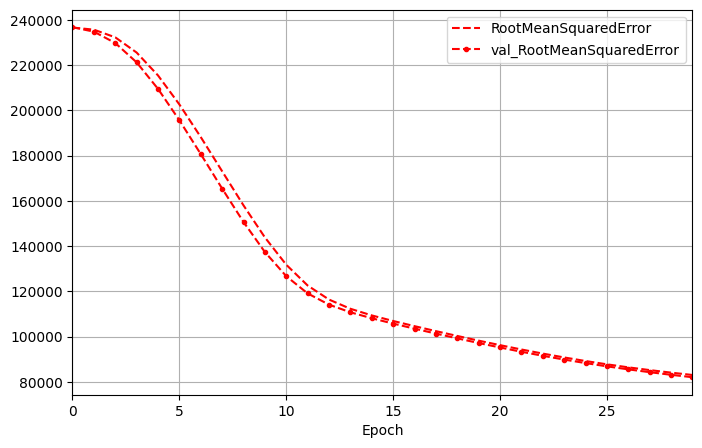

In [43]:
history_df = pd.DataFrame(history.history)
history_df = history_df.drop(["loss", "val_loss"], axis=1)
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b--."],
)
plt.show()

In [44]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - RootMeanSquaredError: 85606.8750 - loss: 7336898560.0000


{'RootMeanSquaredError': 84630.6796875, 'loss': 7162351616.0}

In [45]:
X_new_deep, X_new_wide = X_test_deep[:3], X_test_wide[:3]
X_new_deep.shape, X_new_wide.shape

((3, 6), (3, 5))

In [46]:
model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


array([[129052.57],
       [125439.24],
       [173517.75]], dtype=float32)

## Multiple Output and Wide & Deep

![](assets/multiple-output.png)

*Reasons to have multiple output*

- The task may demand it: for instance, you may want to locate and classify an object in a picture.
- You may have multiple independent tasks bass on the same data. You could of course train multiple NN 
per task but in many cases you will get better results on all tasks by training a single NN with one output per task.
For instance, in case of **multitask classification** on pictures of faces, you may want to recognize a face but also
you may want to say if that face wear glasses.
- Another approuch is for regularization tecniques. The goal is to avoid overfitting giving a weigthed 
value to each output you can make predictions based on multiple output.

In [47]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")

norm_layer_wide = tf.keras.layers.Normalization(name="normalization_wide")
norm_layer_wide.adapt(X_train_wide)

norm_layer_deep = tf.keras.layers.Normalization(name="normalization_deep")
norm_layer_deep.adapt(X_train_deep)

hidden_layer_1 = tf.keras.layers.Dense(30, activation="relu", name="hidden_1")
hidden_layer_2 = tf.keras.layers.Dense(30, activation="relu", name="hidden_2")

concat_layer = tf.keras.layers.Concatenate(name="concat")

output_layer_main = tf.keras.layers.Dense(1, name="output_main")

output_layer_aux = tf.keras.layers.Dense(1, name="output_aux")

normalized_wide = norm_layer_wide(input_wide)

normalized_deep = norm_layer_deep(input_deep)
hidden1 = hidden_layer_1(normalized_deep)
hidden2 = hidden_layer_2(hidden1)

concat = concat_layer([normalized_wide, hidden2])

output_main = output_layer_main(concat)
output_aux = output_layer_aux(hidden2)

model = tf.keras.Model(
    inputs=[input_wide, input_deep], outputs=[output_main, output_aux]
)
model.compile(
    loss=("mse", "mse"),
    loss_weights=(0.9, 0.1),
    optimizer="Adam",
    metrics=["RootMeanSquaredError", "RootMeanSquaredError"],
)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_deep  │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1 (Dense)    │ (None, 30)        │        210 │ normalization_de… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_wide  │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_2 (Dense)    │ (None, 30)        │        930 │ hidden_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 35)        │          0 │ normalization_wi… │
│ (Concatenate)       │                   │            │ hidden_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_main (Dense) │ (None, 1)         │         36 │ concat[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_aux (Dense)  │ (None, 1)         │         31 │ hidden_2[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

In [48]:
print("X_train_wide shape:", X_train_wide.shape)
print("X_train_deep shape:", X_train_deep.shape)
print("X_valid_wide shape:", X_valid_wide.shape)
print("X_valid_deep shape:", X_valid_deep.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train_wide shape: (12000, 5)
X_train_deep shape: (12000, 6)
X_valid_wide shape: (4512, 5)
X_valid_deep shape: (4512, 6)
y_train shape: (12000,)
y_valid shape: (4512,)


In [49]:
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56131190784.0000 - output_aux_RootMeanSquaredError: 236922.2500 - output_main_RootMeanSquaredError: 236916.4375 - val_loss: 55990374400.0000 - val_output_aux_RootMeanSquaredError: 236675.4219 - val_output_main_RootMeanSquaredError: 236617.0312
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55784271872.0000 - output_aux_RootMeanSquaredError: 236273.8750 - output_main_RootMeanSquaredError: 236173.6562 - val_loss: 54813908992.0000 - val_output_aux_RootMeanSquaredError: 234356.1250 - val_output_main_RootMeanSquaredError: 234097.8125
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54198624256.0000 - output_aux_RootMeanSquaredError: 233100.0625 - output_main_RootMeanSquaredError: 232768.5781 - val_loss: 51924348928.0000 - val_output_aux_RootMeanSquaredError: 228380.1250 - val_output_main_RootMeanSquaredError: 227812.2969
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50828361728.0000 - output_au

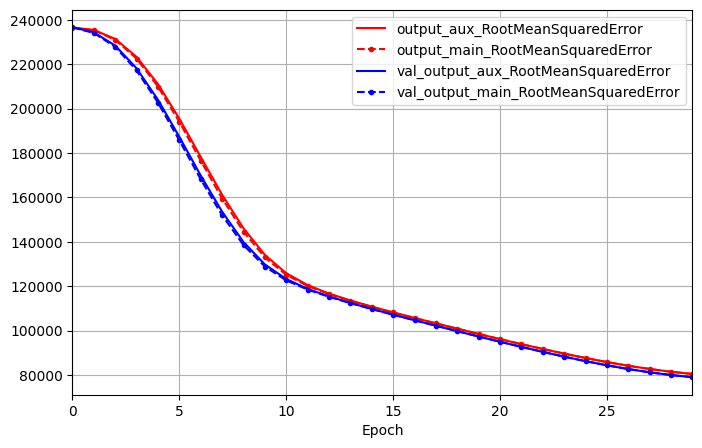

In [50]:
history_df = pd.DataFrame(history.history)
history_df = history_df.drop(["loss", "val_loss"], axis=1)
history_df.plot(
    figsize=(8, 5),
    xlim=[0, 29],
    grid=True,
    xlabel="Epoch",
    style=["r-", "r--.", "b-", "b--."],
)
plt.show()

In [51]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 6839359488.0000 - output_aux_RootMeanSquaredError: 82656.8047 - output_main_RootMeanSquaredError: 82656.8281


{'loss': 6716411904.0,
 'output_aux_RootMeanSquaredError': 81953.0859375,
 'output_main_RootMeanSquaredError': 81953.78125}

In [52]:
X_new_deep, X_new_wide = X_test_deep[:3], X_test_wide[:3]
X_new_deep.shape, X_new_wide.shape

((3, 6), (3, 5))

In [53]:
model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


[array([[123443.336],
        [134594.56 ],
        [174956.34 ]], dtype=float32),
 array([[123460.875],
        [134583.9  ],
        [174972.38 ]], dtype=float32)]

In [55]:
y_test[:3]

array([ 58800., 165800., 139400.], dtype=float32)